In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")

df = pd.read_csv(r'C:\Users\njpri\OneDrive\Documents\Bank Classification\bank-full.csv', delimiter=';')
frame = df

EDA - Exploratory Data Analysis

In [2]:
df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [3]:
#Pandas profiling provides a quick an easy way to begin EDA

import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
#profile = pandas_profiling.ProfileReport(df).to_file('report.html')
profile

<AxesSubplot:>

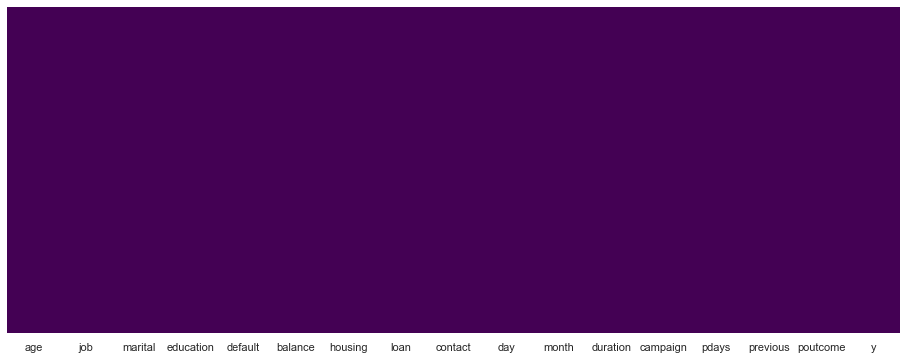

In [4]:
#Although pandas profiling helps with this - using a seaborn heatmap to help find null values

plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#We see there are no null values in the dataset

In [5]:
#This is a handy function to embellish the null value finding process

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [10]:
#Finding the unique values in each column
for col in frame:
    print(col)
    print(frame[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [11]:
#Alternative to the above
df.apply(lambda col: ', '.join(map(str, col.unique())))

age          58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57...
job          management, technician, entrepreneur, blue-col...
marital                              married, single, divorced
education                tertiary, secondary, unknown, primary
default                                                no, yes
balance      2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270,...
housing                                                yes, no
loan                                                   no, yes
contact                           unknown, cellular, telephone
day          5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21,...
month        may, jun, jul, aug, oct, nov, dec, jan, feb, m...
duration     261, 151, 76, 92, 198, 139, 217, 380, 50, 55, ...
campaign     1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 19,...
pdays        -1, 151, 166, 91, 86, 143, 147, 89, 140, 176, ...
previous     0, 3, 1, 4, 2, 11, 16, 6, 5, 10, 12, 7, 18, 9,...
poutcome                      unknown, failure, other, 

<AxesSubplot:xlabel='y', ylabel='count'>

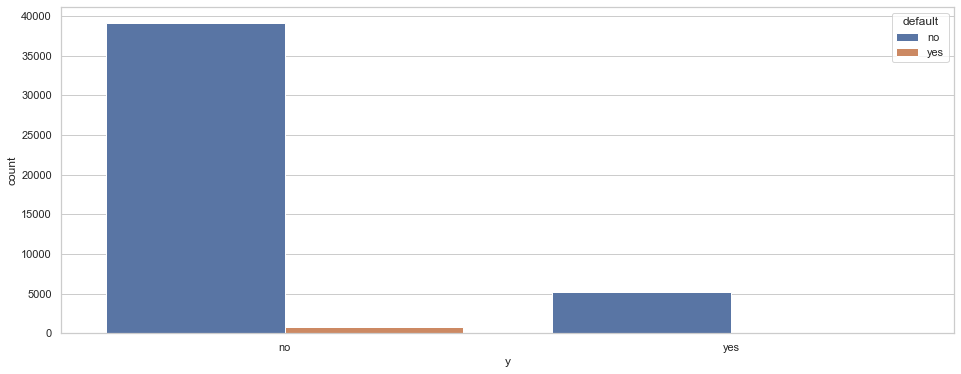

In [7]:
#Performing further EDA
plt.figure(figsize=(16, 6))
sns.countplot(x='y',hue='default',data=df)
#No one who defaults is in the yes category

In [8]:
#Using cufflinks to interact with the charting to help find values easier

import cufflinks as cf
cf.go_offline()
df['age'].iplot(kind='hist',bins=80)

#Significant drop off at the age of 60

<AxesSubplot:xlabel='marital', ylabel='age'>

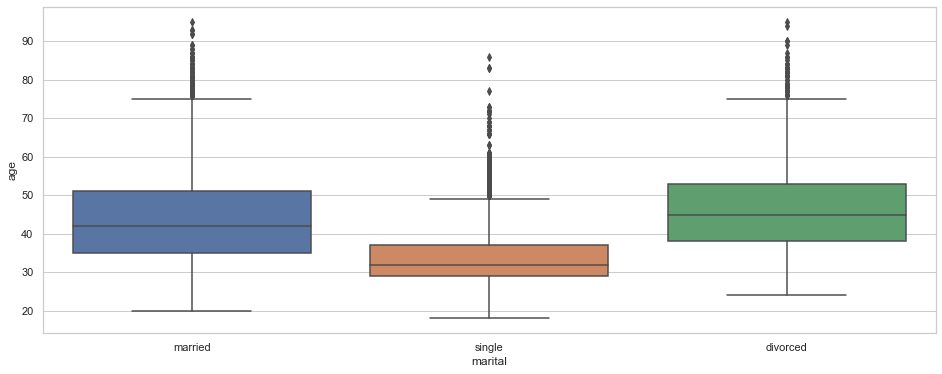

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(y='age',x='marital',data=df)
#Boxplot of age and marital status

In [2]:
#Creating Age squared series - time used to compare apply and *2 

import time
start_time = time.time()

frame['age_squared'] = frame['age'].apply(lambda n: n ** 2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0254518985748291 seconds ---


In [3]:
#Convert categorical data into dummies using dictionary mapping

frame['marital'] = frame['marital'].map({'single':0,'divorced':0,'married':1})
frame['education'] = frame['education'].map({'unknown':0,'primary':0,'secondary':1,'tertiary':2})
frame['default'] = frame['default'].map({'no':0,'yes':1})
frame['housing'] = frame['housing'].map({'no':0,'yes':1})
frame['loan'] = frame['loan'].map({'no':0,'yes':1})
frame['poutcome'] = frame['poutcome'].map({'unknown':0,'failure':0,'other':0,'success':1})
frame['y'] = frame['y'].map({'no':0,'yes':1})

<AxesSubplot:>

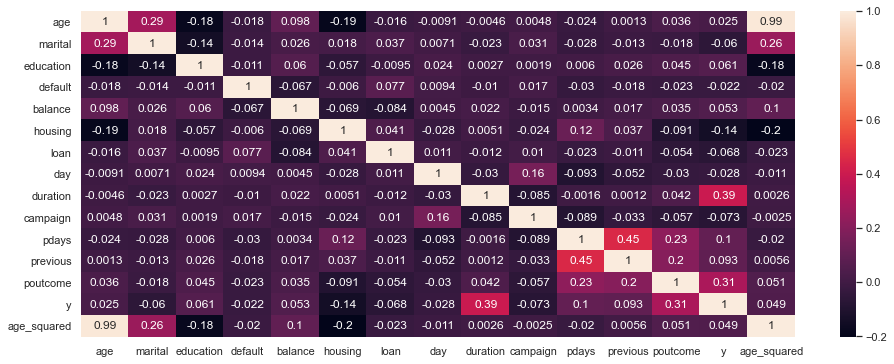

In [16]:
#Correlations heatmap
plt.figure(figsize=(16, 6))
corr = frame.corr()
#print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
           annot = True)

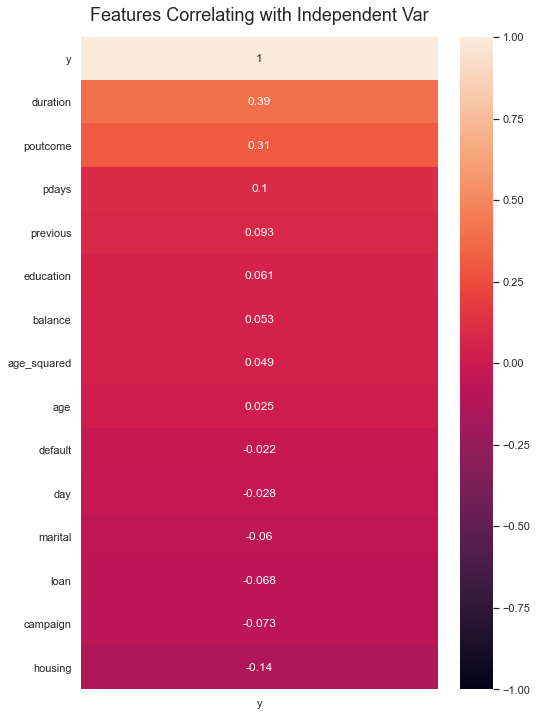

In [19]:
#Correlation with Independent variable

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(frame.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Independent Var', fontdict={'fontsize':18}, pad=16);

In [4]:
job = pd.get_dummies(df['job'])
job = job.add_prefix('job_')
month = pd.get_dummies(df['month'])
month = month.add_prefix('month_')
frame = pd.concat([frame,job,month],axis=1)
frame = frame.drop(['job','contact','month'],axis=1)
frame

age  marital  education  default  balance  housing  loan  day  \
0       58        1          2        0     2143        1     0    5   
1       44        0          1        0       29        1     0    5   
2       33        1          1        0        2        1     1    5   
3       47        1          0        0     1506        1     0    5   
4       33        0          0        0        1        0     0    5   
...    ...      ...        ...      ...      ...      ...   ...  ...   
45206   51        1          2        0      825        0     0   17   
45207   71        0          0        0     1729        0     0   17   
45208   72        1          1        0     5715        0     0   17   
45209   57        1          1        0      668        0     0   17   
45210   37        1          1        0     2971        0     0   17   

       duration  campaign  ...  month_dec  month_feb  month_jan  month_jul  \
0           261         1  ...          0          0          0          0   
1           151         1  ...          0          0          0          0   
2            76         1  ...          0          0          0          0   
3            92         1  ...          0          0          0          0   
4           198         1  ...          0          0          0          0   
...         ...       ...  ...        ...        ...        ...        ...   
45206       977         3  ...          0          0          0          0   
45207       456         2  ...          0          0          0          0   
45208      1127         5  ...          0          0          0          0   
45209       508         4  ...          0          0          0          0   
45210       361         2  ...          0          0          0          0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0              0          0          1          0          0          0  
1              0          0          1          0          0          0  
2              0          0          1          0          0          0  
3              0          0          1          0          0          0  
4              0          0          1          0          0          0  
...          ...        ...        ...        ...        ...        ...  
45206          0          0          0          1          0          0  
45207          0          0          0          1          0          0  
45208          0          0          0          1          0          0  
45209          0          0          0          1          0          0  
45210          0          0          0          1          0          0  

[45211 rows x 39 columns]

----Logistic Regresion-----

In [5]:
#Importing packages

import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [6]:
#Definining independent and dependent variables
y = frame['y']
X = frame.drop('y',axis=1)

In [55]:
X

age  marital  education  default  balance  housing  loan  day  \
0       58        1          2        0     2143        1     0    5   
1       44        0          1        0       29        1     0    5   
2       33        1          1        0        2        1     1    5   
3       47        1          0        0     1506        1     0    5   
4       33        0          0        0        1        0     0    5   
...    ...      ...        ...      ...      ...      ...   ...  ...   
45206   51        1          2        0      825        0     0   17   
45207   71        0          0        0     1729        0     0   17   
45208   72        1          1        0     5715        0     0   17   
45209   57        1          1        0      668        0     0   17   
45210   37        1          1        0     2971        0     0   17   

       duration  campaign  ...  month_dec  month_feb  month_jan  month_jul  \
0           261         1  ...          0          0          0          0   
1           151         1  ...          0          0          0          0   
2            76         1  ...          0          0          0          0   
3            92         1  ...          0          0          0          0   
4           198         1  ...          0          0          0          0   
...         ...       ...  ...        ...        ...        ...        ...   
45206       977         3  ...          0          0          0          0   
45207       456         2  ...          0          0          0          0   
45208      1127         5  ...          0          0          0          0   
45209       508         4  ...          0          0          0          0   
45210       361         2  ...          0          0          0          0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0              0          0          1          0          0          0  
1              0          0          1          0          0          0  
2              0          0          1          0          0          0  
3              0          0          1          0          0          0  
4              0          0          1          0          0          0  
...          ...        ...        ...        ...        ...        ...  
45206          0          0          0          1          0          0  
45207          0          0          0          1          0          0  
45208          0          0          0          1          0          0  
45209          0          0          0          1          0          0  
45210          0          0          0          1          0          0  

[45211 rows x 38 columns]

In [7]:
#Splitting into test & train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Using Recursive feature selection to choose which variables to use

data_final_vars=frame.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Fit to the training data
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

E:\Anconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
E:\Anconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as

[False  True  True  True False  True  True False False False False False
  True False False False False False False  True False False  True False
  True False  True False  True  True False False False  True False False
  True  True]
[15  1  1  1 24  1  1 20 17  8 18 10  1 19  5  9  7  3 16  1 12 13  1 23
  1 22  1 11  1  1  2  6 21  1  4 14  1  1]


In [9]:
#View chosen features

X_train.loc[:, rfe.support_]

marital  education  default  housing  loan  poutcome  job_retired  \
10747        0          2        0        0     0         0            0   
26054        1          1        0        0     0         0            0   
9125         1          1        0        1     0         0            0   
41659        0          2        0        0     0         1            0   
4443         1          1        0        1     0         0            0   
...        ...        ...      ...      ...   ...       ...          ...   
11284        0          0        0        0     0         0            0   
44732        0          2        0        0     0         0            0   
38158        0          2        0        1     0         0            0   
860          1          1        0        0     0         0            1   
15795        1          0        0        1     0         0            0   

       job_student  job_unemployed  month_apr  month_dec  month_feb  \
10747            0               0          0          0          0   
26054            0               0          0          0          0   
9125             0               0          0          0          0   
41659            0               0          0          0          0   
4443             0               0          0          0          0   
...            ...             ...        ...        ...        ...   
11284            0               0          0          0          0   
44732            1               0          0          0          0   
38158            0               0          0          0          0   
860              0               0          0          0          0   
15795            0               0          0          0          0   

       month_mar  month_oct  month_sep  
10747          0          0          0  
26054          0          0          0  
9125           0          0          0  
41659          0          1          0  
4443           0          0          0  
...          ...        ...        ...  
11284          0          0          0  
44732          0          0          1  
38158          0          0          0  
860            0          0          0  
15795          0          0          0  

[31647 rows x 15 columns]

In [10]:
#Subset the data to selected features
X=X.loc[:, rfe.support_]
X

marital  education  default  housing  loan  poutcome  job_retired  \
0            1          2        0        1     0         0            0   
1            0          1        0        1     0         0            0   
2            1          1        0        1     1         0            0   
3            1          0        0        1     0         0            0   
4            0          0        0        0     0         0            0   
...        ...        ...      ...      ...   ...       ...          ...   
45206        1          2        0        0     0         0            0   
45207        0          0        0        0     0         0            1   
45208        1          1        0        0     0         1            1   
45209        1          1        0        0     0         0            0   
45210        1          1        0        0     0         0            0   

       job_student  job_unemployed  month_apr  month_dec  month_feb  \
0                0               0          0          0          0   
1                0               0          0          0          0   
2                0               0          0          0          0   
3                0               0          0          0          0   
4                0               0          0          0          0   
...            ...             ...        ...        ...        ...   
45206            0               0          0          0          0   
45207            0               0          0          0          0   
45208            0               0          0          0          0   
45209            0               0          0          0          0   
45210            0               0          0          0          0   

       month_mar  month_oct  month_sep  
0              0          0          0  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
45206          0          0          0  
45207          0          0          0  
45208          0          0          0  
45209          0          0          0  
45210          0          0          0  

[45211 rows x 15 columns]

In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.339932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: y                AIC:              30767.3495
Date:               2021-06-20 17:56 BIC:              30898.1360
No. Observations:   45211            Log-Likelihood:   -15369.   
Df Model:           14               LL-Null:          -16315.   
Df Residuals:       45196            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
marital          -1.1624   0.0263 -44.1500 0.0000 -1.2140 -1.1108
education        -0.6613   0.0157 -42.1532 0.0000 -0.6921 -0.6306


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11800   169]
 [ 1310   285]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.63      0.18      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



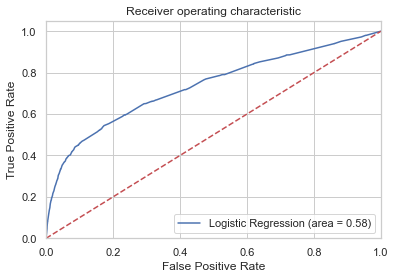

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()